In [15]:
def make_positive_angles(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = x[i] + 360
        else:
            x[i] = x[i]
    return x

In [16]:
dih1 = []
with open("../Data/PDBdistributions/ps_parsed.csv", "r") as file:
    lines=file.readlines()[1:]
    for line in lines:
        dih1.append(float(line.split()[7]))
        #print(file.split())

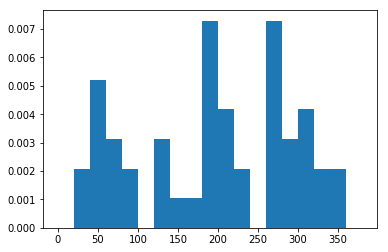

In [30]:
import matplotlib.pyplot as plt
import numpy as np
dist = plt.hist(make_positive_angles(dih1), bins=range(0,400,20), density=True)
outfile=open('../Data/' + "PS" + "dih1" + '.dat','w')
for i in range(len(dist[0])):
#print(str(dist[1][i]),str(dist[0][i]))
    outfile.write(str(dist[1][i]) + " " + str(dist[0][i]) + "\n")
outfile.close()

In [31]:
dist

(array([0.        , 0.00208333, 0.00520833, 0.003125  , 0.00208333,
        0.        , 0.003125  , 0.00104167, 0.00104167, 0.00729167,
        0.00416667, 0.00208333, 0.        , 0.00729167, 0.003125  ,
        0.00416667, 0.00208333, 0.00208333, 0.        ]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340, 360, 380]),
 <a list of 19 Patch objects>)